<a href="https://colab.research.google.com/github/rgsvm/rgsvm/blob/main/CNN_IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [21]:
X_train = np.loadtxt('/input.csv', delimiter = ',')
Y_train = np.loadtxt('/labels.csv', delimiter = ',')

X_test = np.loadtxt('/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/labels_test.csv', delimiter = ',')

In [22]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [23]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [24]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [25]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


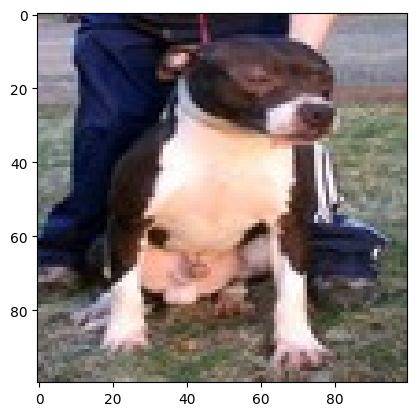

In [27]:
# Printing a random picture
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [28]:
# Model
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 726ms/step - accuracy: 0.8047 - loss: 0.4311
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 731ms/step - accuracy: 0.8490 - loss: 0.3705
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 734ms/step - accuracy: 0.8725 - loss: 0.3141
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 721ms/step - accuracy: 0.8943 - loss: 0.2574
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 960ms/step - accuracy: 0.9267 - loss: 0.1999
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 737ms/step - accuracy: 0.9482 - loss: 0.1546
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 695ms/step - accuracy: 0.9596 - loss: 0.1236
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 726ms/step - accuracy: 0.9757 - loss: 0.0836
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 705ms/step - accuracy: 0.9851 - loss: 0.0627
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 768ms/step - accuracy: 0.9762 - loss: 0.0759


In [47]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6638 - loss: 1.2617


[1.0356698036193848, 0.6899999976158142]

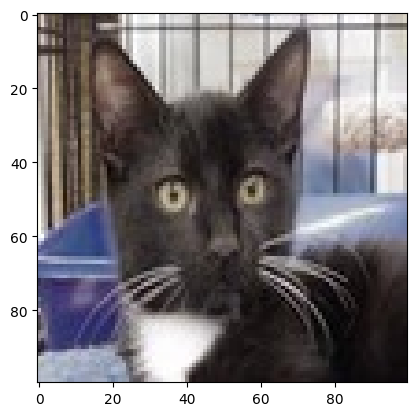

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Our model says it is a : cat


In [55]:
#Making predictions

idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)